### 1 Load libraries, define functions and load model

In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn.pipeline import make_pipeline, make_union
import math
from keras.utils import to_categorical
from keras.models import load_model
import h5py

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
os.chdir('../..')
from app_local.module import GestureTransformer, DataEnsembler

In [5]:
def plot_chart_predict(plots_per_row=30, body_part='leftWrist', date='20181127', file='all'):
    
    if file == 'all':
        file_names = listdir('app_local/model_inputs/')
    else:
        file_names = ['model_input_' + date + '_'+ file + '.csv']
    n = len(file_names)

    global movements
    
    kx = body_part + '_x'
    ky = body_part + '_y'
    
    for j in range(n // plots_per_row + 1):
        
        plt.figure(figsize=(2 * plots_per_row, 2))

        for i in range (plots_per_row):
            plt.subplot(1, plots_per_row, i + 1)
            index = j*plots_per_row + i
            
            # specify axes range
            axes = plt.gca()
            axes.set_xlim([-2,2])
            axes.set_ylim([-2,2])
            axes.get_yaxis().set_visible(False)
            axes.get_xaxis().set_visible(False)

            if index < n:

                df = pd.read_csv('app_local/model_inputs/' + file_names[index])

                feature_names = list(df.columns)
                feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
                gt = GestureTransformer(byrow=True, feature_names=feature_names)

                D = df.values.reshape(1,18,16)
                D = gt.transform(D).reshape(18,16)
                Dx = D[:,feat_dict[kx]]
                Dy = D[:,feat_dict[ky]]    

                # movement
                l1, u1 = 0, 16
                plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

                # current frame
                plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")
                
                plt.title(file_names[index].replace('model_input_' + date + '_','').replace('.csv',''))

        plt.show()
        plt.close()    

In [6]:
cols_x = ['leftShoulder_x',
          'rightShoulder_x',
          'leftWrist_x',
          'rightWrist_x',
          'leftHip_x',
          'rightHip_x',
          'leftElbow_x',
          'rightElbow_x']

cols_y = [col.replace('x', 'y') for col in cols_x]

cols = sorted(cols_x + cols_y)

In [13]:
model = load_model('models/model_gesture.h5')

### 2 Check selected live predictions / training data

#### 2.1 Live Prediction | Timestamp 104314625894

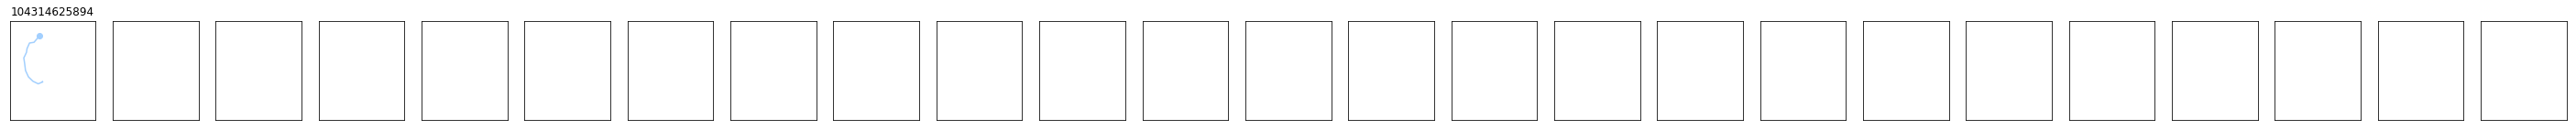

In [8]:
plot_chart_predict(plots_per_row=25, body_part='leftWrist', date='20181127', file='104314625894')

In [33]:
pose_df = pd.read_csv('app_local/model_inputs/model_input_20181127_104314625894.csv')

In [34]:
processing_pipeline = make_pipeline(GestureTransformer(byrow=True,feature_names=cols))
pose_np = pose_df.values.reshape(1, 18, len(cols))
pose_np[0][0]

array([351.7316039, 335.2690431, 321.2171731, 420.0585736, 332.8371939,
       256.1326601, 366.0379467, 412.7804165, 220.6884181, 344.5272706,
       254.1383128, 422.5388619, 239.2848454, 254.4574071, 214.9826732,
       425.4129208])

In [35]:
pose_np = processing_pipeline.fit_transform(pose_np)
pose_np[0][0]

array([-0.39072761,  0.01823955, -0.20690982, -0.49252942, -0.27690839,
        0.49495417, -0.47690848, -0.44868607,  0.39867165, -0.03753167,
        0.19717074, -0.50747058,  0.28664747,  0.50504583,  0.43304285,
       -0.52478381])

In [36]:
model.predict(pose_np)[0]

array([3.19284736e-04, 9.86718237e-01, 6.11299129e-07, 1.18793659e-08,
       2.11046176e-06, 1.29597485e-02, 5.30230615e-08], dtype=float32)

#### 2.2 Training Data | features_takeoff_c_01_120, frames 151 to 167

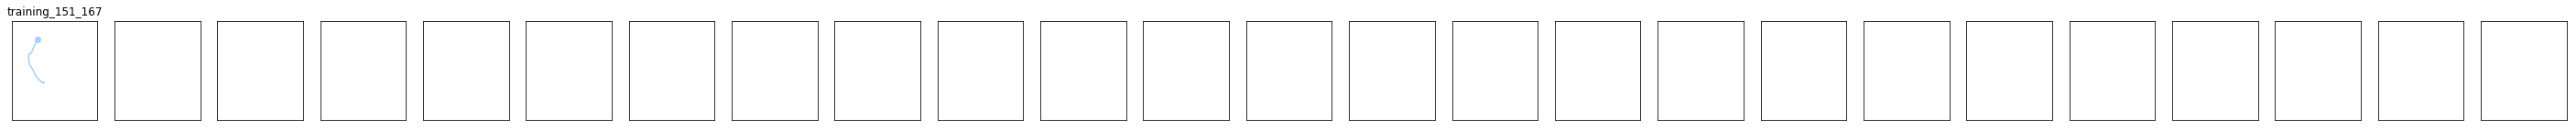

In [15]:
plot_chart_predict(plots_per_row=25, body_part='leftWrist', date='20181127', file='training_151_167')

In [16]:
pose_df = pd.read_csv('app_local/model_inputs/model_input_20181127_training_151_167.csv')

In [17]:
processing_pipeline = make_pipeline(GestureTransformer(byrow=True,feature_names=cols))
pose_np = pose_df.values.reshape(1, 18, len(cols))
pose_np[0][0]

array([389.6962432, 214.6599576, 380.5009363, 261.5632467, 380.6254207,
       168.8750554, 405.0888571, 255.4704776, 321.8176585, 217.0908015,
       344.3561758, 254.6083091, 330.061571 , 172.1223857, 318.2895889,
       262.3353729])

In [18]:
pose_np = processing_pipeline.fit_transform(pose_np)
pose_np[0][0]

array([-0.35176678, -0.0041982 , -0.24678201, -0.539703  , -0.24820328,
        0.51853773, -0.52750752, -0.47014056,  0.42321741, -0.03195166,
        0.16589038, -0.460297  ,  0.32909491,  0.48146227,  0.46349813,
       -0.54851853])

In [19]:
model.predict(pose_np)[0]

array([6.1666255e-04, 9.9723583e-01, 4.1500655e-07, 1.0436134e-09,
       6.1352716e-07, 2.1466599e-03, 4.7097806e-09], dtype=float32)

#### 2.3 Training Data | features_takeoff_c_01_120, frames 168 to 184

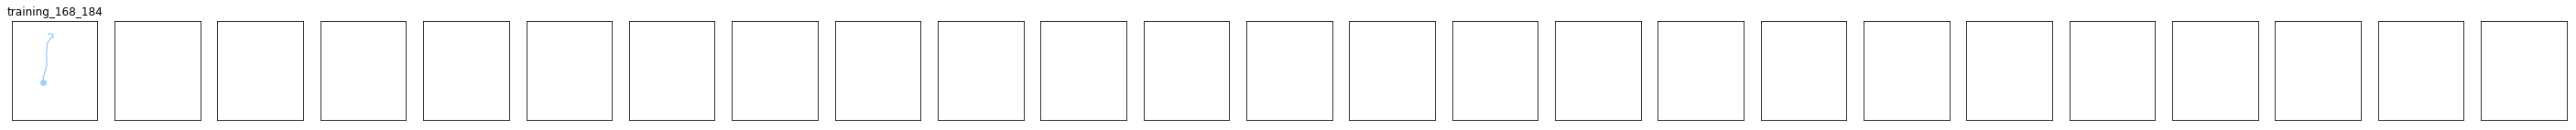

In [20]:
plot_chart_predict(plots_per_row=25, body_part='leftWrist', date='20181127', file='training_168_184')

In [21]:
pose_df = pd.read_csv('app_local/model_inputs/model_input_20181127_training_168_184.csv')

In [22]:
processing_pipeline = make_pipeline(GestureTransformer(byrow=True,feature_names=cols))
pose_np = pose_df.values.reshape(1, 18, len(cols))
pose_np[0][0]

array([381.4113643 , 106.8226455 , 367.3810285 , 253.8849463 ,
       368.6741891 , 152.6233622 , 377.513282  ,  55.00323014,
       303.1845922 , 108.4809881 , 339.1522039 , 250.865283  ,
       319.9900919 , 151.7021771 , 315.451921  ,  60.32190235])

In [23]:
pose_np = processing_pipeline.fit_transform(pose_np)
pose_np[0][0]

array([-0.32542883,  0.95244051, -0.18542277, -0.51506632, -0.19832697,
        0.49540383, -0.2865306 ,  1.46953663,  0.45518131,  0.93589222,
        0.09626733, -0.48493368,  0.28748241,  0.50459617,  0.33276796,
        1.41646261])

In [24]:
model.predict(pose_np)[0]

array([9.9092954e-01, 8.3067007e-03, 7.7952373e-06, 2.4276281e-04,
       6.3763153e-05, 4.1969517e-05, 4.0754495e-04], dtype=float32)

### 3 Check all take-off training data

#### 3.1 Load data

In [25]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)

steps: 18
self.data_df.shape[0]: 620
steps: 18
self.data_df.shape[0]: 536
steps: 18
self.data_df.shape[0]: 515
steps: 18
self.data_df.shape[0]: 667
steps: 18
self.data_df.shape[0]: 525
steps: 18
self.data_df.shape[0]: 483
steps: 18
self.data_df.shape[0]: 618
steps: 18
self.data_df.shape[0]: 457
steps: 18
self.data_df.shape[0]: 507
steps: 18
self.data_df.shape[0]: 493
steps: 18
self.data_df.shape[0]: 509
steps: 18
self.data_df.shape[0]: 453
steps: 18
self.data_df.shape[0]: 483
steps: 18
self.data_df.shape[0]: 568
steps: 18
self.data_df.shape[0]: 567
steps: 18
self.data_df.shape[0]: 566
steps: 18
self.data_df.shape[0]: 558
steps: 18
self.data_df.shape[0]: 552
steps: 18
self.data_df.shape[0]: 566
steps: 18
self.data_df.shape[0]: 633
steps: 18
self.data_df.shape[0]: 638
steps: 18
self.data_df.shape[0]: 607
steps: 18
self.data_df.shape[0]: 477
steps: 18
self.data_df.shape[0]: 531
steps: 18
self.data_df.shape[0]: 940
steps: 18
self.data_df.shape[0]: 562
steps: 18
self.data_df.shape[0]: 564
s

In [26]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 49
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 37
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 59
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 138
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 95
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 90
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 107
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 83
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 70
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 74
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 85
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 59
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 86
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 71
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 58
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 55
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 52
i: 17 	shape X: (535, 

#### 3.2 Keep only data labelled as take-off

In [27]:
X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
keep_idx = np.concatenate([idx[1]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")

print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (18188,)
X: (18188, 18, 16)

Labels before removal of 'no movements'
0 15618
1 356
2 368
3 575
4 365
5 449
6 457

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (356,)
X: (356, 18, 16)

Labels after removal of 'no movements'
0 0
1 356
2 0
3 0
4 0
5 0
6 0

---------------------------------------------------------------------
Shapes after transformation:
y: (356, 2)
X: (356, 18, 16)


#### 3.3 Plot gesture alongside prediction

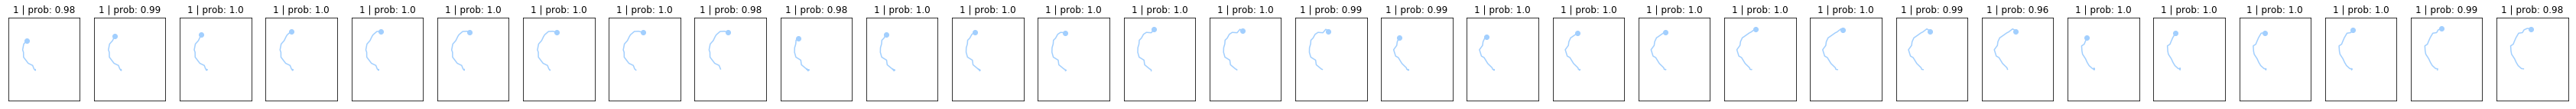

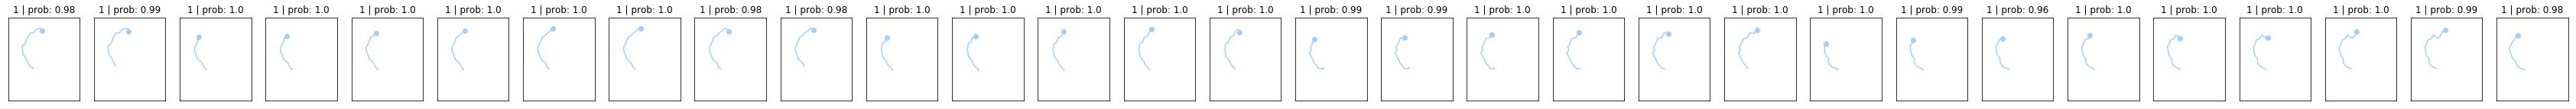

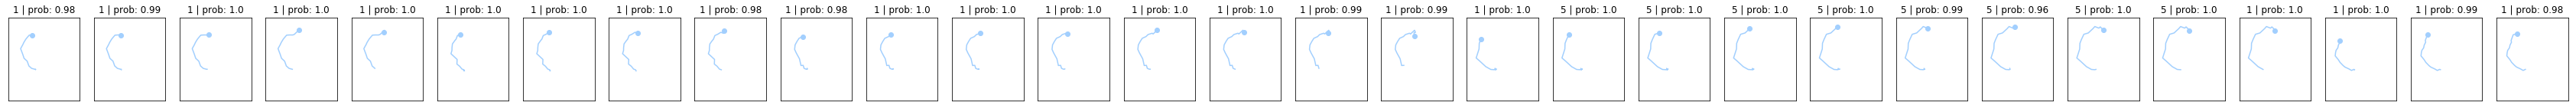

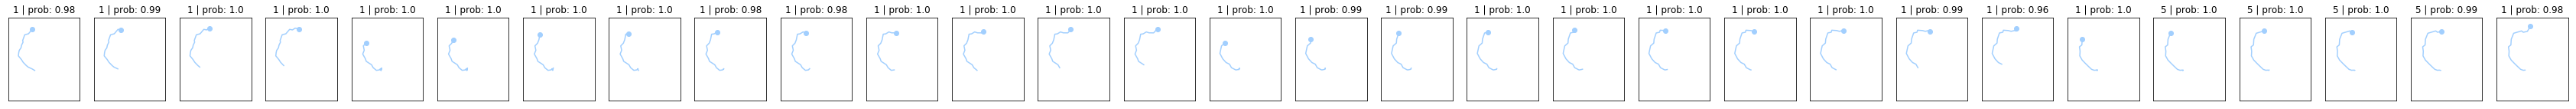

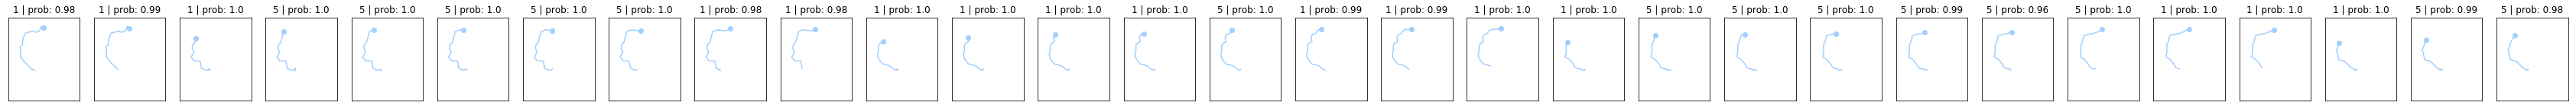

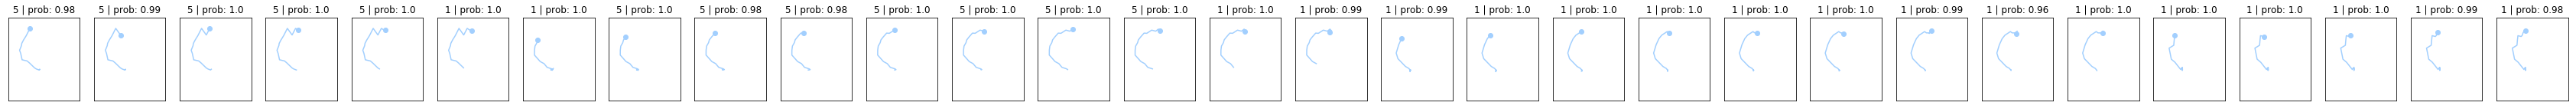

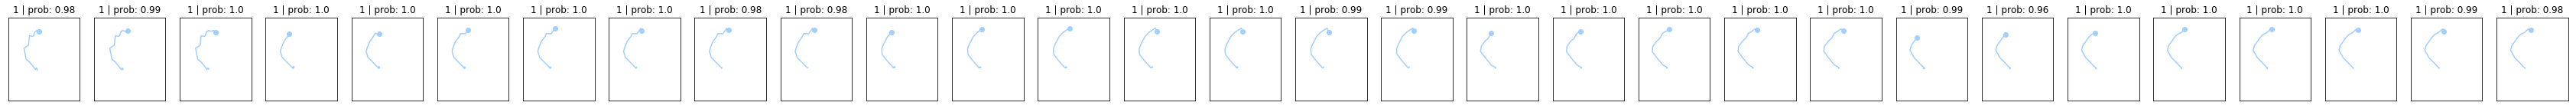

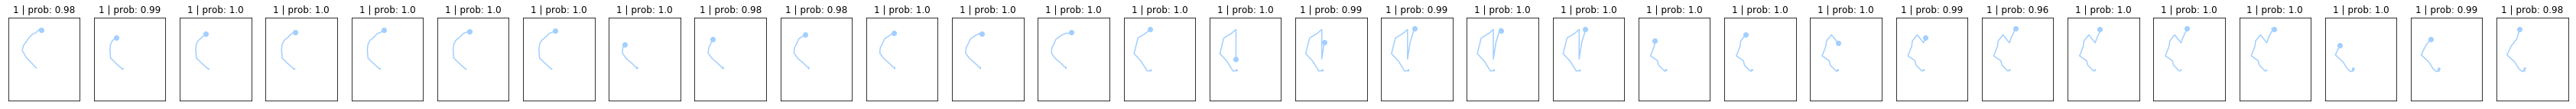

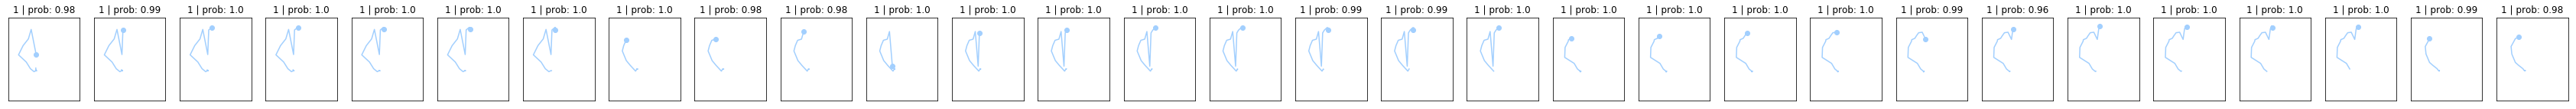

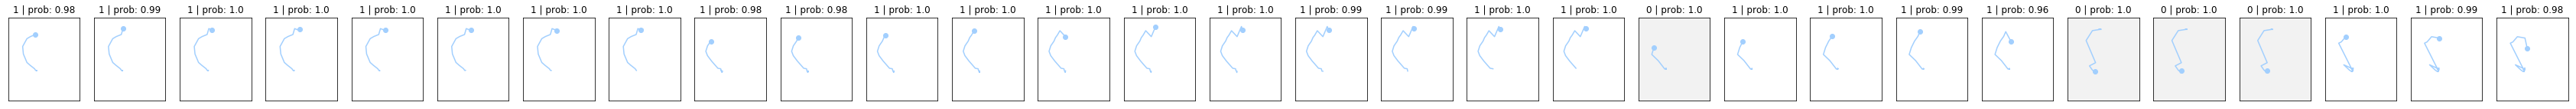

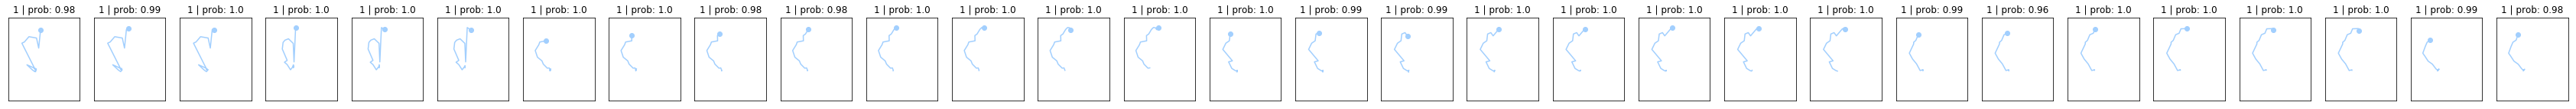

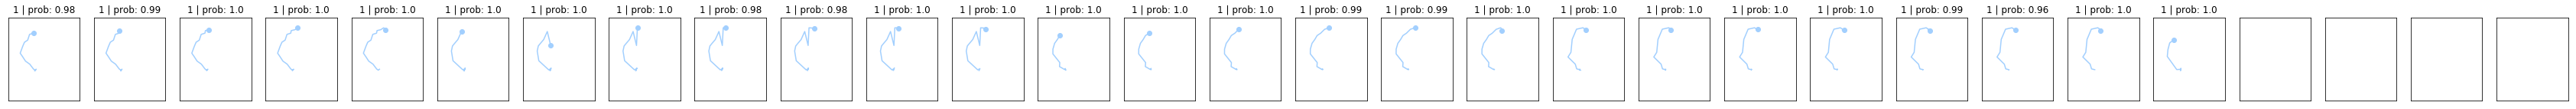

In [28]:
plots_per_row = 30
n = len(y)

body_part = 'leftWrist'
kx = body_part + '_x'
ky = body_part + '_y'

for j in range(n // plots_per_row + 1):
        
    plt.figure(figsize=(2 * plots_per_row, 2))

    for i in range (plots_per_row):
        plt.subplot(1, plots_per_row, i + 1)
        index = j*plots_per_row + i

        # specify axes range
        axes = plt.gca()
        axes.set_xlim([-2,2])
        axes.set_ylim([-2,2])
        axes.get_yaxis().set_visible(False)
        axes.get_xaxis().set_visible(False)

        if index < n:
            
            if (model.predict_classes(X[index:(index+1),:,:])[0])==0:
                axes.set_facecolor((0.95, 0.95, 0.95))

            feature_names = cols
            feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
            gt = GestureTransformer(byrow=True, feature_names=feature_names)

            D = X[index]
            Dx = D[:,feat_dict[kx]]
            Dy = D[:,feat_dict[ky]]    

            # movement
            l1, u1 = 0, 16
            plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

            # current frame
            plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")

            plt.title(str(model.predict_classes(X[index:(index+1),:,:])[0]) + ' | prob: ' + str(round(np.max(model.predict_proba(X[i:(i+1),:,:])),2)))

    plt.show()
    plt.close()    